In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder

In [61]:
file = pd.read_csv('synthetic_licensing_data.csv')
file.head()

,Application_ID,Applicant_Name,Business_Name,Application_Date,Business_Address,Premises_Type,Applicant_Type,Seating_Capacity,Area_Type,Previous_Licenses_Held,...,Lineups_on_Public_Property,Ancillary_Areas,Proximity_to_Residential_Area,Proximity_to_School,Fire_Safety_Certificate,Municipal_Approval,Application_Status,Risk_Score,Risk_Classification,Licensing_Decision
0,LSL-00001,Anthony Gallagher,"Summers, Burke and Jones",2024-04-16 04:45:48.977253,"119 Myers Cliffs\nSouth Bailey, QC B1R 1P2",Bar,Sole Proprietor,109,Indoor,No,...,No,No,No,No,Valid,Approved,Submitted,4,Low,Approved
1,LSL-00002,Kimberly Harris,Hall Group,2023-12-28 03:50:01.772401,"46082 Aaron Port Apt. 727\nMollyborough, QC E8...",Bar,Sole Proprietor,74,Outdoor,Yes,...,No,No,No,No,Valid,Approved,Under Review,1,Low,Approved
2,LSL-00003,Ian Miller,Hernandez Inc,2024-09-08 06:44:13.888628,"74725 Hanson Canyon Apt. 719\nGriffithstad, NB...",Bar,Corporation,132,Indoor,No,...,No,No,No,No,Valid,Approved,Under Review,5,Low,Approved
3,LSL-00004,Jason Anderson,"Bishop, Johnson and Nguyen",2024-02-11 06:10:26.891724,"762 Adam Plaza Apt. 083\nNew Michael, ON X7Y 7J7",Restaurant,Corporation,112,Outdoor,Yes,...,No,No,No,No,Valid,Approved,Submitted,0,Low,Approved
4,LSL-00005,Sara Bradley,Baker Group,2024-01-16 03:28:08.046932,"713 Martinez Crescent\nSouth Trevor, QC S2K 3K6",Bar,Sole Proprietor,125,Outdoor,Yes,...,No,No,No,No,Valid,Approved,Submitted,1,Low,Approved


In [63]:
file_shortened = file
file_shortened.head()

file_shortened.columns

Index(['Application_ID', 'Applicant_Name', 'Business_Name', 'Application_Date',
       'Business_Address', 'Premises_Type', 'Applicant_Type',
       'Seating_Capacity', 'Area_Type', 'Previous_Licenses_Held',
       'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership',
       'Business_Longevity', 'Licensed_Areas', 'Automated_Liquor_Dispensers',
       'Lineups_on_Public_Property', 'Ancillary_Areas',
       'Proximity_to_Residential_Area', 'Proximity_to_School',
       'Fire_Safety_Certificate', 'Municipal_Approval', 'Application_Status',
       'Risk_Score', 'Risk_Classification', 'Licensing_Decision'],
      dtype='object')

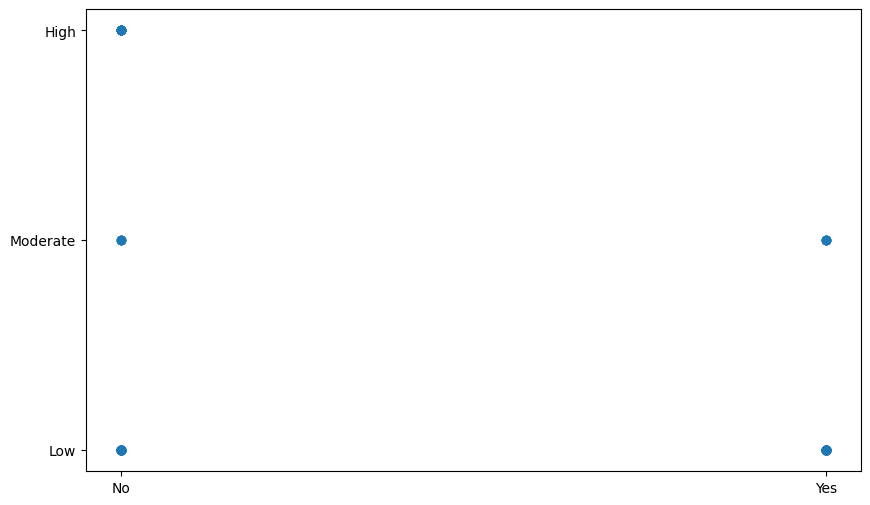

In [65]:
plt.figure(figsize = (10,6))
plt.scatter(file_shortened['Previous_Licenses_Held'], file_shortened['Risk_Classification'])
plt.show()

In [67]:
#le = LabelEncoder()

#columns_to_encode = ['Premises_Type', 'Applicant_Type', 'Area_Type', 'Previous_Licenses_Held',
               #'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 'Business_Longevity',
               #'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property', 'Ancillary_Areas',
               #'Proximity_to_Residential_Area', 'Proximity_to_School', 'Fire_Safety_Certificate',
               #'Municipal_Approval', 'Application_Status']
#encodings = {}

#for col in columns_to_encode:
    #file_shortened[col] = le.fit_transform(file_shortened[col])
    #encodings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

#for column, mapping in encodings.items():
   # print(f"Column: {column}")
    #print(mapping)
    #print("\n")


In [69]:

X = file_shortened[['Premises_Type', 'Applicant_Type', 'Area_Type', 'Previous_Licenses_Held',
               'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 'Business_Longevity',
               'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property', 'Ancillary_Areas',
               'Proximity_to_Residential_Area', 'Proximity_to_School', 'Fire_Safety_Certificate',
               'Municipal_Approval', 'Application_Status']]
print(X)
y = file_shortened['Risk_Classification']
print(X['Compliance_History'].unique())

   Premises_Type       Applicant_Type Area_Type Previous_Licenses_Held  \
0            Bar      Sole Proprietor    Indoor                     No   
1            Bar      Sole Proprietor   Outdoor                    Yes   
2            Bar          Corporation    Indoor                     No   
3     Restaurant          Corporation   Outdoor                    Yes   
4            Bar      Sole Proprietor   Outdoor                    Yes   
..           ...                  ...       ...                    ...   
95  Banquet Hall  Limited Partnership      Both                     No   
96    Night Club          Corporation      Both                     No   
97    Night Club          Corporation      Both                     No   
98    Night Club  Limited Partnership      Both                     No   
99  Banquet Hall  Limited Partnership      Both                     No   

   Compliance_History Tax_Compliance_Status Premises_Ownership  \
0                 NaN             Compliant  

In [71]:
print(X['Compliance_History'].unique())

[nan 'Minor' 'Multiple' 'Severe']


In [73]:
# Assign weights to the Premise
premises_type_weights = {
    'Adult Entertainment': 3, 
    'Arcade-style Facility': 1, 'Art Gallery': 1, 
    'Athletic Club': 2, 
    'Auditorium': 1, 
    'Automotive / Marina': 1, 
    'Banquet Hall': 1, 
    'Bar / Sports Bar': 3, 
    'Big Box Retail Store': 1, 
    'Billiard / Pool Hall': 2, 
    'Bingo Hall': 1, 
    'Bookstore': 1, 
    'Bowling Alley': 2, 
    'Community Centre': 1, 
    'Convenient Store': 2, 
    'Educational Facility-Over 19 yrs of age': 1, 
    'Funeral Home': 1, 
    'General Store': 2, 
    'Golf Course': 1, 
    'Grocery Store': 2, 
    'Hair Salon / Barber Shop': 1, 
    'Historical Site / Landmark': 1, 
    'Hotel / Motel': 2, 
    'Internet Cafe': 1, 
    'Karaoke Bar / Restaurant': 3, 
    'Laundromat': 1, 
    'Live Theatre': 2, 
    'Medical Facility': 1, 
    'Military': 1, 
    'Motion Picture Theatre': 2, 
    'Museum': 1, 
    'Night Club': 3, 
    'Other': 3, 
    'Railway Car': 1, 
    'Restaurant (Franchise)': 2, 
    'Restaurant / Bar': 3, 
    'Retirement Residence': 1, 
    'Social Club': 3, 
    'Spa': 1, 
    'Speciality Food Store': 1, 
    'Specialty Merchandise Store': 1, 
    'Stadium': 2, 
    'Train': 1
}






In [75]:
compliance_history_weights = {
    "Minor": 2,
    "Multiple": 3,
    "Severe": 4
}

tax_compliance_held_weights = {
    'Compliant':1,
    'Non-Compliant': 2
    
}


X['Compliance_History'] = X['Compliance_History'].map(compliance_history_weights).fillna(1)
X['Tax_Compliance_Status'] = X['Tax_Compliance_Status'].map(tax_compliance_held_weights).fillna(0)
X['Premises_Type'] = X['Premises_Type'].map(premises_type_weights).fillna(0)


proximity_weights = {"Yes": 1, "No": 0}
fire_safety_weights = {'Valid': 1, 'Expired': 2}
municipal_approval_weights = {'Approved': 1, 'Pending': 2}

X['Previous_Licenses_Held'] = X['Previous_Licenses_Held'].map(proximity_weights)
X['Proximity_to_Residential_Area'] = X['Proximity_to_Residential_Area'].map(proximity_weights)
X['Proximity_to_School'] = X['Proximity_to_School'].map(proximity_weights)
X['Fire_Safety_Certificate'] = X['Fire_Safety_Certificate'].map(fire_safety_weights)
X['Municipal_Approval'] = X['Municipal_Approval'].map(municipal_approval_weights)

/var/folders/y0/rywhw6cn491ct7zgtsthdgrw0000gn/T/ipykernel_56808/2396741499.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Compliance_History'] = X['Compliance_History'].map(compliance_history_weights).fillna(1)
/var/folders/y0/rywhw6cn491ct7zgtsthdgrw0000gn/T/ipykernel_56808/2396741499.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tax_Compliance_Status'] = X['Tax_Compliance_Status'].map(tax_compliance_held_weights).fillna(0)
/var/folders/y0/rywhw6cn491ct7zgtsthdgrw0000gn/T/ipykernel_5680

In [77]:
# Weights to the IMPORTANT features
weights = {
    'Compliance_History': 400,  # Make 'Compliance_History' 3 times more influential
    'Previous_Licenses_Held': 100,  # Make 'Previous_Licenses_Held' 2 times more influential
    'Premises_Type': 100,
    'Proximity_to_Residential_Area': 100,
    'Proximity_to_School': 100,
    'Fire_Safety_Certificate': 100,
    'Municipal_Approval': 100
    
}

In [79]:
for feature, weight in weights.items():
    X.loc[:, feature] = X[feature] * weight
print(X)

    Premises_Type       Applicant_Type Area_Type  Previous_Licenses_Held  \
0             0.0      Sole Proprietor    Indoor                       0   
1             0.0      Sole Proprietor   Outdoor                     100   
2             0.0          Corporation    Indoor                       0   
3             0.0          Corporation   Outdoor                     100   
4             0.0      Sole Proprietor   Outdoor                     100   
..            ...                  ...       ...                     ...   
95          100.0  Limited Partnership      Both                       0   
96          300.0          Corporation      Both                       0   
97          300.0          Corporation      Both                       0   
98          300.0  Limited Partnership      Both                       0   
99          100.0  Limited Partnership      Both                       0   

    Compliance_History  Tax_Compliance_Status Premises_Ownership  \
0                40

In [81]:
# Encode the rest of the values
columns_to_encode = [
    'Applicant_Type', 'Area_Type', 'Premises_Ownership', 'Business_Longevity',
    'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property', 
    'Ancillary_Areas',  'Application_Status'
]
label_encoder = LabelEncoder()

for col in columns_to_encode:
    X[col] = label_encoder.fit_transform(X[col])

X

/var/folders/y0/rywhw6cn491ct7zgtsthdgrw0000gn/T/ipykernel_56808/271779911.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
/var/folders/y0/rywhw6cn491ct7zgtsthdgrw0000gn/T/ipykernel_56808/271779911.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
/var/folders/y0/rywhw6cn491ct7zgtsthdgrw0000gn/T/ipykernel_56808/271779911.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Premises_Type,Applicant_Type,Area_Type,Previous_Licenses_Held,Compliance_History,Tax_Compliance_Status,Premises_Ownership,Business_Longevity,Licensed_Areas,Automated_Liquor_Dispensers,Lineups_on_Public_Property,Ancillary_Areas,Proximity_to_Residential_Area,Proximity_to_School,Fire_Safety_Certificate,Municipal_Approval,Application_Status
0,0.0,2,1,0,400.0,1,1,0,2,0,0,0,0,0,100,100,0
1,0.0,2,2,100,400.0,1,1,2,0,0,0,0,0,0,100,100,1
2,0.0,0,1,0,800.0,1,1,0,0,0,0,0,0,0,100,100,1
3,0.0,0,2,100,800.0,1,1,2,2,0,0,0,0,0,100,100,0
4,0.0,2,2,100,400.0,1,1,2,0,0,0,0,0,0,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,1,0,0,1600.0,2,0,1,1,1,1,1,100,100,200,200,1
96,300.0,0,0,0,1200.0,2,0,1,1,1,1,1,100,100,200,200,1
97,300.0,0,0,0,1600.0,2,0,1,1,1,1,1,100,100,200,200,0
98,300.0,1,0,0,1200.0,2,0,1,1,1,1,1,100,100,200,200,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

                          Feature  Importance
6              Premises_Ownership    0.662586
13            Proximity_to_School    0.264949
5           Tax_Compliance_Status    0.072465
0                   Premises_Type    0.000000
10     Lineups_on_Public_Property    0.000000
15             Municipal_Approval    0.000000
14        Fire_Safety_Certificate    0.000000
12  Proximity_to_Residential_Area    0.000000
11                Ancillary_Areas    0.000000
8                  Licensed_Areas    0.000000
9     Automated_Liquor_Dispensers    0.000000
1                  Applicant_Type    0.000000
7              Business_Longevity    0.000000
4              Compliance_History    0.000000
3          Previous_Licenses_Held    0.000000
2                       Area_Type    0.000000
16             Application_Status    0.000000
Accuracy: 0.95
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.94      1.00      0.97     

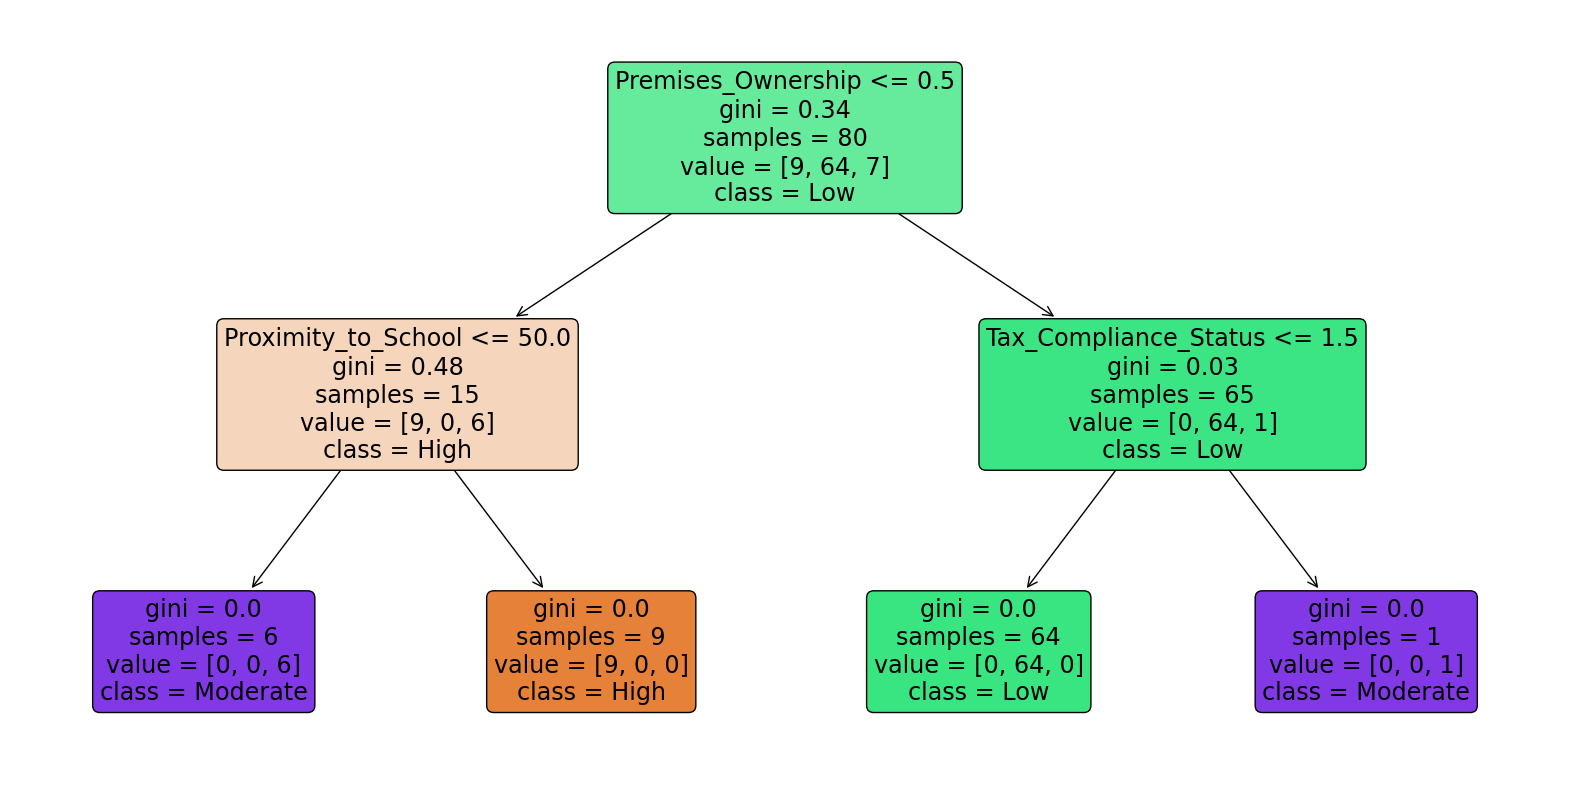

In [87]:
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
plot_tree(model, 
          feature_names=['Premises_Type', 'Applicant_Type', 'Area_Type', 'Previous_Licenses_Held',
               'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 'Business_Longevity',
               'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property', 'Ancillary_Areas',
               'Proximity_to_Residential_Area', 'Proximity_to_School', 'Fire_Safety_Certificate',
               'Municipal_Approval', 'Application_Status'],  
          class_names=model.classes_.astype(str),  # Use class names (targets)
          filled=True,  # Color nodes to indicate purity
          rounded=True)  # Make the nodes rounded for a cleaner look

plt.show()